In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
x = (25,15)

In [ ]:
header = pd.read_csv('/content/space_missions_data_dictionary.csv')
header

,Field,Description
0,Company,Company responsible for the space mission
1,Location,Location of the launch
2,Date,Date of the launch
3,Time,Time of the launch (UTC)
4,Rocket,Name of the rocket used for the mission
5,Mission,Name of the space mission (or missions)
6,RocketStatus,Status of the rocket as of August 2022 (Active...
7,Price,Cost of the rocket in millions of US dollars
8,MissionStatus,"Status of the mission (Success, Failure, Parti..."


In [ ]:
space = pd.read_csv('/content/space_missions.csv',encoding='latin-1')
space

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure
...,...,...,...,...,...,...,...,...,...
4625,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",2022-07-22,17:39:00,Falcon 9 Block 5,Starlink Group 3-2,Active,67,Success
4626,CASC,"LC-101, Wenchang Satellite Launch Center, China",2022-07-24,06:22:00,Long March 5B,Wentian,Active,NaN,Success
4627,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2022-07-24,13:38:00,Falcon 9 Block 5,Starlink Group 4-25,Active,67,Success
4628,CAS Space,"Jiuquan Satellite Launch Center, China",2022-07-27,04:12:00,Zhongke-1A,Demo Flight,Active,NaN,Success


In [ ]:
space['Success'] = space['MissionStatus'] == 'Success'
sum(space.Success)

4162

In [ ]:
year = pd.to_datetime(space['Date']).dt.year
space['Year'] = year

## How have rocket launches trended across time? Has mission success rate increased?



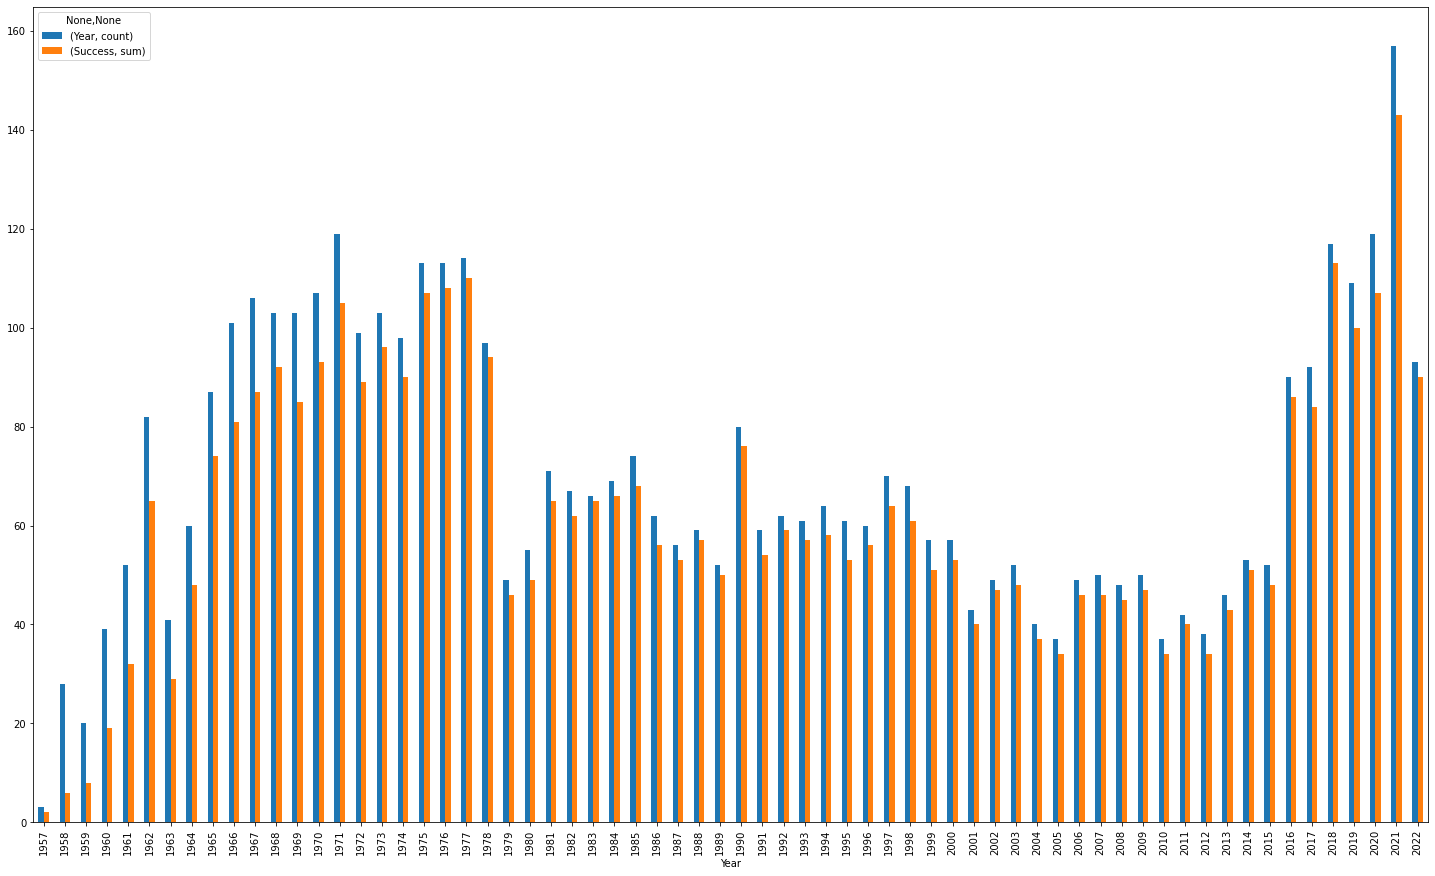

In [ ]:
space.groupby('Year').agg({'Year':['count']
                           ,'Success':['sum']}).plot.bar(figsize = x)

In [ ]:
space[['Time', 'Year']].groupby('Year').count().sort_values('Time', ascending = False)['Time'].head(3)

Year
2021    156
2020    119
2018    117
Name: Time, dtype: int64

Rocket launch trends have changed in success over time. The plot shows that there was a buildup in rocket launches towards the mid to late 70's and then a steap drop off in 1979. The years following reveal a significant reduction in space flight activity. Then in 2016 a sharp increase in space launches occured. The most space flights that occured in one year was 156 in 2021 and the least in 1957 with 3 flights.

## Which countries have had the most successful space missions? Has it always been that way?



In [ ]:
space[['Company', 'Success']].groupby('Company').sum().sort_values('Success', ascending = False).head(10)

,Success
Company,
RVSN USSR,1614
CASC,318
Arianespace,282
General Dynamics,203
VKS RF,202
NASA,186
SpaceX,172
ULA,150
Boeing,131


In [ ]:
space['Company'].nunique()

62

In [ ]:
space['Country'] = space['Location'].str.split(pat=",").apply(lambda x: x[-1])

In [ ]:
space[['Country', 'Success', 'Year']].groupby(['Country', 'Year']).sum()

Success
Country     Year         
 Australia  1967        1
            1968        1
            1969        0
            1970        0
            1971        1
...                   ...
 USA        2021       52
            2022       43
 Yellow Sea 2019        1
            2020        1
            2022        1

[458 rows x 1 columns]

In [ ]:
pd.Series(space['Country'].unique())

0                          Kazakhstan
1                                 USA
2                              Russia
3                              France
4                               Japan
5                               Kenya
6                           Australia
7                               China
8                               India
9                              Israel
10                       Gran Canaria
11                             Brazil
12                        Barents Sea
13                        North Korea
14                      Pacific Ocean
15                               Iran
16                        South Korea
17     Pacific Missile Range Facility
18                        New Zealand
19                         New Mexico
20                         Yellow Sea
21          Shahrud Missile Test Site
dtype: object

In [ ]:
space.groupby('Country')['Company'].apply(lambda x: list(np.unique(x))).reset_index(name='new')

,Country,new
0,Australia,"[AMBA, CECLES, RAE]"
1,Barents Sea,[SRC]
2,Brazil,[AEB]
3,China,"[CAS Space, CASC, CASIC, ExPace, Galactic Ener..."
4,France,"[Arianespace, Armée de l'Air, CECLES, CNES, ESA]"
5,Gran Canaria,[Northrop]
6,India,[ISRO]
7,Iran,"[IRGC, ISA]"
8,Israel,[IAI]
9,Japan,"[ISAS, JAXA, MHI, UT]"


In [ ]:
country = {
    ' Gran Canaria' : 'USA',
    ' Barents Sea' : 'USA',
    ' Pacific Missile Range Facility' : 'USA',
    ' Pacific Ocean' : 'USA',
    ' Shahrud Missile Test Site' : 'Iran',
    ' Yellow Sea' : 'China',
    ' New Mexico' : 'USA',
    ' Kazakhstan' : 'Russia',
    ' Russia': 'Russia'
}
space['Country'] = space['Country'].replace(country)
pd.Series(space['Country'].unique())

0           Russia
1              USA
2           France
3            Japan
4            Kenya
5        Australia
6            China
7            India
8           Israel
9              USA
10          Brazil
11     North Korea
12            Iran
13     South Korea
14     New Zealand
15           China
16            Iran
dtype: object

In [ ]:
space[["Country", 'Success']].groupby('Country').sum().sort_values('Success', ascending = False).tail(5)

,Success
Country,
Australia,3
North Korea,2
South Korea,2
Iran,1
Brazil,0


Russia has the most total with USA very close behind

In [ ]:
space[space['Country']=='Brazil']

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus,Success,Year,Country


In [ ]:
top5 = space[["Country", 'Success']].groupby('Country').sum().sort_values('Success', ascending = False).head(5).index
top5 = space[space['Country'].isin(top5)]
len(top5), len(space)

(4415, 4630)

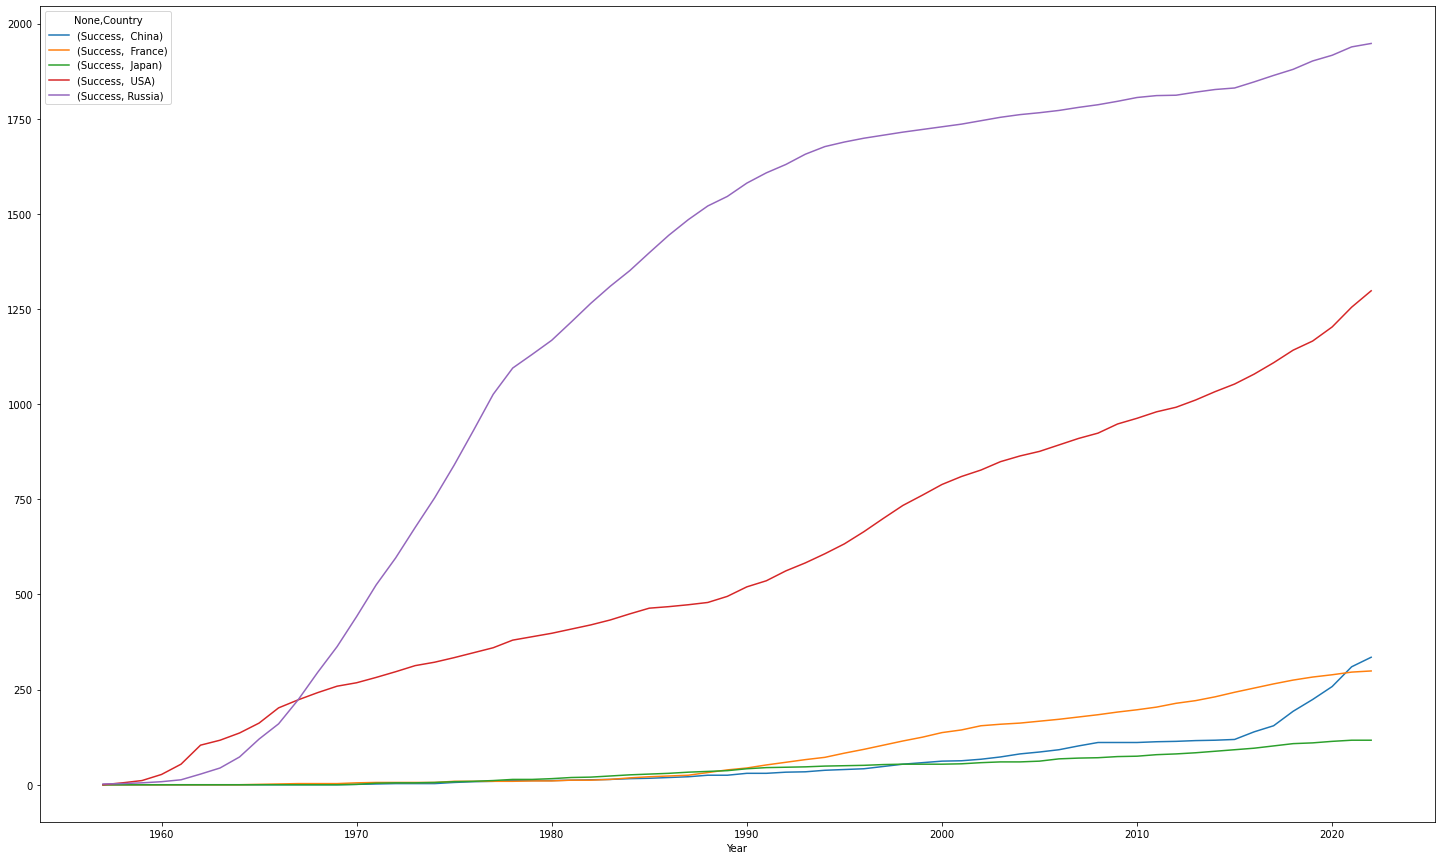

In [ ]:
top5[['Year', 'Country', 'Success']].groupby(['Year','Country']).sum().reset_index().pivot(index = 'Year', columns = 'Country').fillna(0).cumsum().plot.line(figsize = x)

Initially, the USA had more launches but was quickly surpassed by russias space program. We can see from the above dataframes that Russia has had the most successful launches compared to all of the countries on the list.

## Which rocket has been used for the most space missions? Is it still active?

In [ ]:
space[['Rocket','RocketStatus']].groupby('Rocket').agg({'RocketStatus' : [lambda x: list(np.unique(x))[-1], 'count']}).sort_values(('RocketStatus','count'), ascending = False)

RocketStatus      
                      <lambda_0> count
Rocket                                
Cosmos-3M (11K65M)       Retired   446
Voskhod                  Retired   299
Molniya-M /Block ML      Retired   128
Cosmos-2I (63SM)         Retired   126
Soyuz U                  Retired   125
...                          ...   ...
Energiya/Polyus          Retired     1
Energiya/Buran           Retired     1
Conestoga-1620           Retired     1
Delta 3920-8             Retired     1
Zoljanah                  Active     1

[370 rows x 2 columns]

The most used rocket is the Cosmos-3M (11K65M), this rocket is retired

In [ ]:
space[space['RocketStatus'] == 'Active'][['Rocket','RocketStatus']].groupby('Rocket').count().sort_values("RocketStatus", ascending = False).head(5)

,RocketStatus
Rocket,
Falcon 9 Block 5,111
Ariane 5 ECA,80
Long March 2D,44
Long March 2C,43
Long March 3B/E,41


In [ ]:
space[space['RocketStatus'] == 'Retired'][['Rocket','RocketStatus']].groupby('Rocket').count().sort_values("RocketStatus", ascending = False).head(5)

,RocketStatus
Rocket,
Cosmos-3M (11K65M),446
Voskhod,299
Molniya-M /Block ML,128
Cosmos-2I (63SM),126
Soyuz U,125


The most used rocket that is still active is the Falcon 9 Block 5

## Are there any patterns you can notice with the launch locations?


In [ ]:
clean_cities = {
    'Cape Canaveral AFS': 'Cape Canaveral',
    'Plesetsk Cosmodrome':'Arkhangelsk Oblast',
    'San Marco Launch Platform' : 'Malindi',
    'RAAF Woomera Range Complex':'Adelaide',
    'Palmachim Airbase':'Rishon LeZion',
    'Taiyuan Satellite Launch Center':'Shanxi',
    'Barents Sea Launch Area':'Murmansk',
    'Kiritimati Launch Area':'Kiritimati',
    'Yasny Cosmodrome':'Yasny',
    'Semnan Space Center':'Semnan',
    'Wenchang Satellite Launch Center':'Wenchang',
    'M?hia Peninsula':'Mahia Peninsula',
    'Shahrud Missile Test Site':'Shahrud',
    'Mojave Air and Space Port':'Mojave',
    'Vandenberg SFB':'Vandenberg, CA',
    'Shahrud Missile Test Site':'Shahrud'
}

space['Loca'] = space['Location'].str.replace(r'(.*?, )', '', n = 1, regex = True)
citi = pd.Series(space['Loca'].unique()).str.split(pat = ', ').apply(lambda x: x[0]).replace(clean_cities)
space['cities'] = citi
cities = pd.Series(space['cities'].unique()).sort_values()

In [ ]:
pip install geopy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="yup")

geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

In [ ]:
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
cit = cities.apply(geocode)

point = cit.apply(lambda loc: tuple(loc.point) if loc else None)

In [ ]:
loca = pd.DataFrame(data = {'City': cities, 'Location': point})
coords = pd.DataFrame(loca['Location'].tolist(), index=loca.index).rename(mapper = {0:'Latitude',1:'Longitude'}, axis = 1).drop(2, axis = 1)

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 89.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 87.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 11.6 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [ ]:
import geopandas

In [ ]:
avglat = np.mean(coords.Latitude)

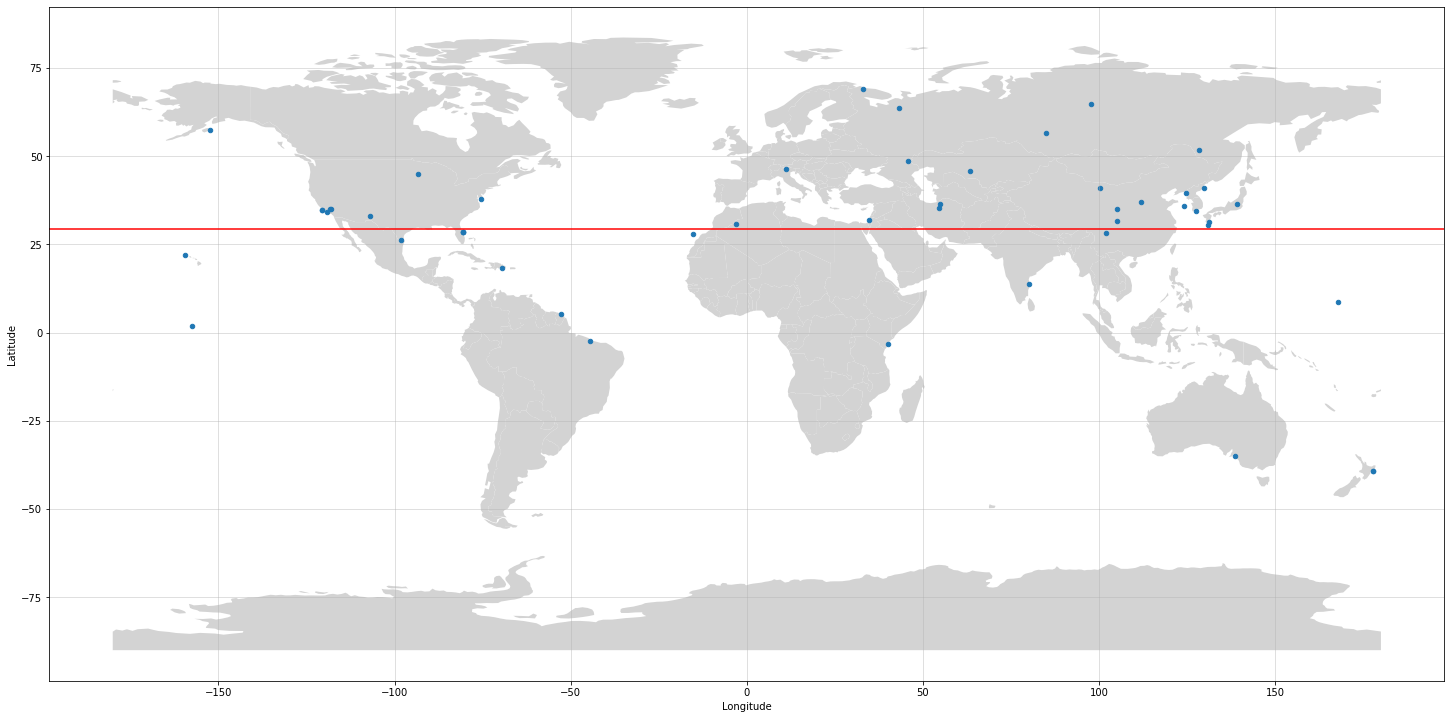

In [ ]:
fig, ax = plt.subplots(figsize=x)
# plot map on axis
countries = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
countries.plot(color="lightgrey",ax=ax)
# plot points
coords.plot(x="Longitude", y="Latitude", kind="scatter", ax=ax)
# add grid
ax.grid(b=True, alpha=0.5)
plt.axhline(y = avglat, color = 'r', linestyle = '-')
plt.show()

From the map we can see that a majority of the launch sites take place near water. This is probably due to the fact that an error in launch would be dangerous to civilians and we would want to minimize the possibility of the wreckage harming people. Also, many of the launch sites have large bodies of water to the east. This is probably due to earths roatation giving rocket launches an extra bit of boost when it is launched in the direction of spin. The red line plotted on the map is the average latitude of the launch locations. This line shows that most of the launches occcur in the norther hemisphere.